In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
import statsmodels.api as sm
import scipy.stats as stats

In [476]:
df = pd.read_csv('car_details.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [477]:
df.shape

(4340, 8)

In [478]:
def verificar_colunas_com_unico_valor(dataframe):
    colunas_unico_valor = []
    for coluna in dataframe.columns:
        if dataframe[coluna].nunique() == 1:
            colunas_unico_valor.append(coluna)
    return colunas_unico_valor

# Aplicar a função e imprimir o resultado
colunas_com_unico_valor = verificar_colunas_com_unico_valor(df)
print("Colunas com um único valor:", colunas_com_unico_valor)

Colunas com um único valor: []


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [480]:
df1 = df.copy()

In [481]:
# Criar a coluna 'brand' pegando as duas primeiras palavras da coluna 'name'
df1['brand'] = df1['name'].str.split().str[:2].str.join(' ')

In [482]:
df1.drop('name', axis=1, inplace=True)

In [483]:
# Reordenar as colunas colocando "brand" em primeiro lugar
cols = ['brand'] + [col for col in df1.columns if col != 'brand']
df1 = df1[cols]

In [484]:
df1.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


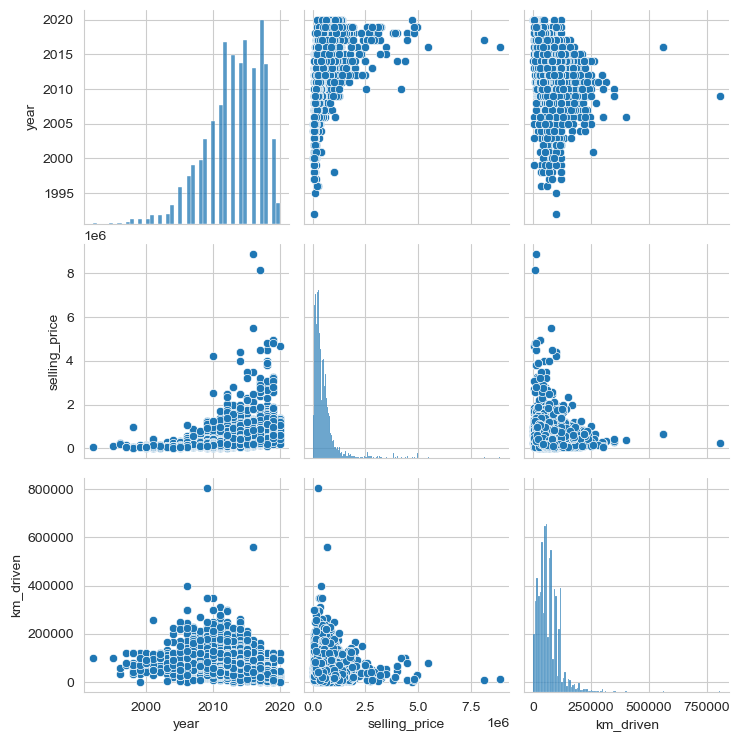

In [485]:
numeric_features = ['year', 'selling_price', 'km_driven',]
sns.pairplot(df1[numeric_features])
plt.show()

In [486]:
df1.describe()

,year,selling_price,km_driven
count,4340.00,4340.00,4340.00
mean,2013.09,504127.31,66215.78
std,4.22,578548.74,46644.10
min,1992.00,20000.00,1.00
25%,2011.00,208749.75,35000.00
50%,2014.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


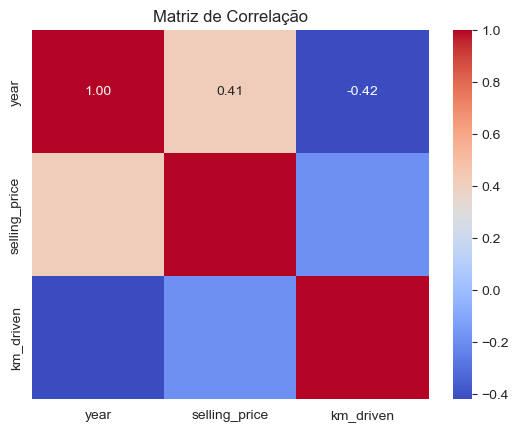

In [487]:
correlation_matrix = df1[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [488]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

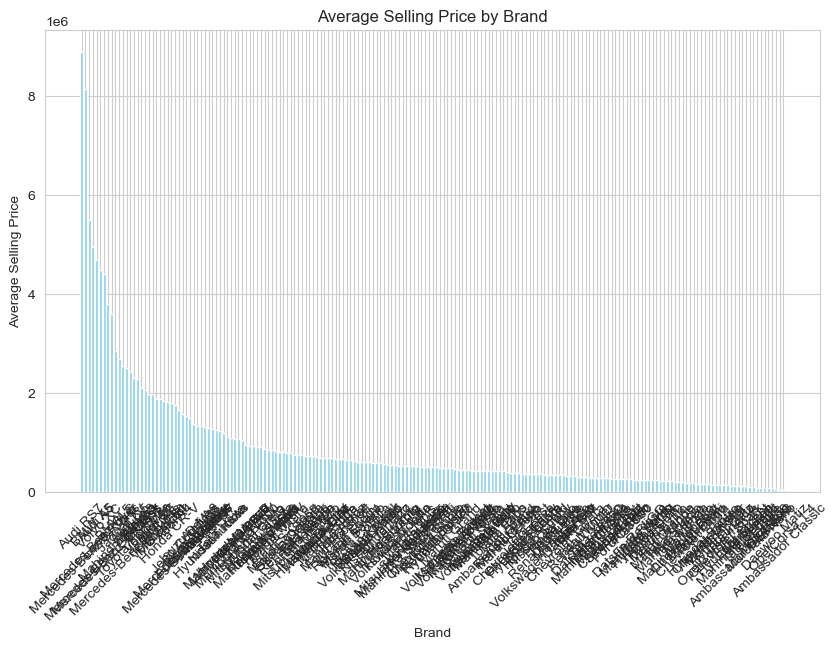

In [489]:
average_price_by_brand = df1.groupby('brand')['selling_price'].mean().reset_index()
average_price_by_brand = average_price_by_brand.sort_values(by='selling_price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_brand['brand'], average_price_by_brand['selling_price'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()



In [490]:
df1_filtered = df1[df1['selling_price'] < 6000000]
# Aplicar filtros adicionais baseados na coluna 'brand'
# Para 'Tata', remover valores acima de 700 mil
df1_filtered = df1_filtered[~((df1_filtered['brand'] == 'Tata') & (df1_filtered['selling_price'] > 700000))]

# Para 'Hyundai', remover valores acima de 1 milhão
df1_filtered = df1_filtered[~((df1_filtered['brand'] == 'Hyundai') & (df1_filtered['selling_price'] > 1000000))]



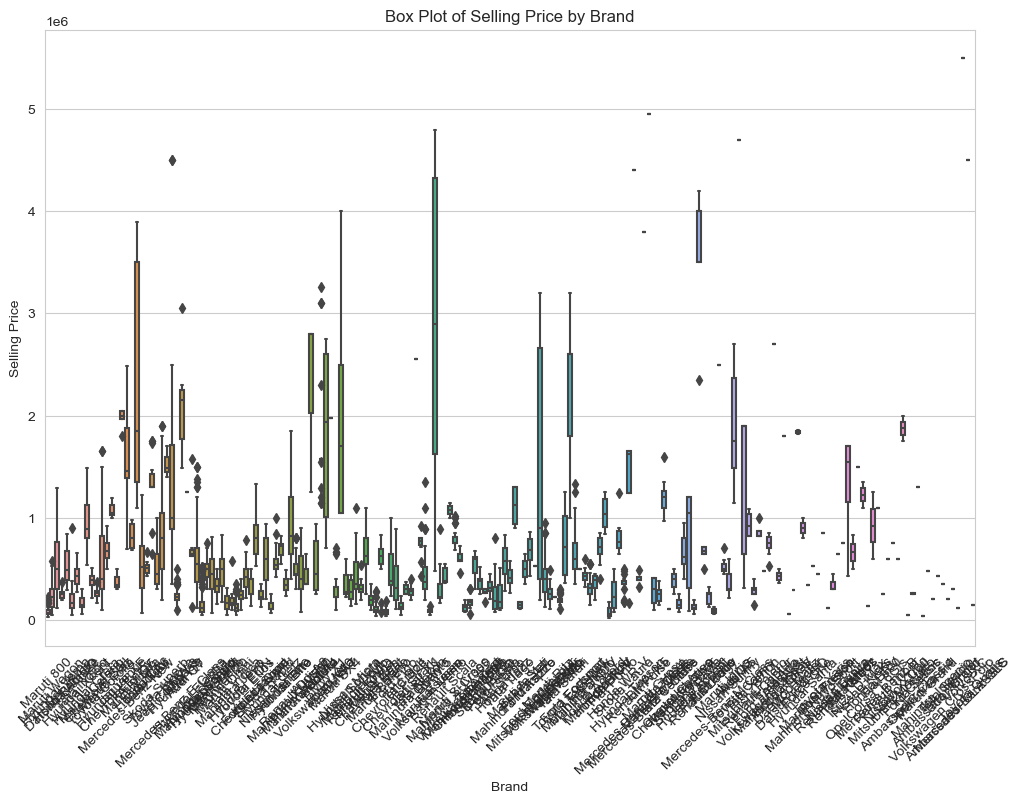

In [491]:
# Mostrar as primeiras linhas do dataframe filtrado para verificar o resultado
df1_filtered.head()
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='selling_price', data=df1_filtered)
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Brand')
plt.xticks(rotation=45)
plt.show()

In [492]:
max_year = df1_filtered['year'].max()
df1_filtered['age'] = max_year - df1_filtered['year']


In [493]:
df1_filtered.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [494]:
df1_encoded = pd.get_dummies(df1_filtered, columns=['brand', 'fuel', 'seller_type', 'transmission'])

In [495]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador CLASSIC,brand_Ambassador Classic,brand_Ambassador Grand,brand_Audi A4,brand_Audi A5,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [496]:
df1_encoded.head()

,year,selling_price,km_driven,owner,age,brand_Ambassador CLASSIC,brand_Ambassador Classic,brand_Ambassador Grand,brand_Audi A4,brand_Audi A5,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,2007,135000,50000,First Owner,13,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2012,600000,100000,First Owner,8,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,2017,250000,46000,First Owner,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,2014,450000,141000,Second Owner,6,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [497]:
# Criar um dicionário para mapear os valores
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Aplicar o mapeamento à coluna 'owner'
df1_encoded['owner_encoded'] = df1_encoded['owner'].map(owner_mapping)

# Agrupar por 'owner' e 'owner_encoded' e contar o número de linhas em cada grupo
owner_counts = df1_encoded.groupby(['owner', 'owner_encoded']).size().reset_index(name='counts')
owner_counts

,owner,owner_encoded,counts
0,First Owner,1,2830
1,Fourth & Above Owner,4,81
2,Second Owner,2,1106
3,Test Drive Car,5,17
4,Third Owner,3,304


In [498]:
df_model = df1_encoded.copy()

In [499]:
columns_to_drop = [col for col in ['year', 'owner'] if col in df_model.columns]

# Remover as colunas existentes
df_model.drop(columns_to_drop, axis=1, inplace=True)
df_model.head()


,selling_price,km_driven,age,brand_Ambassador CLASSIC,brand_Ambassador Classic,brand_Ambassador Grand,brand_Audi A4,brand_Audi A5,brand_Audi A6,brand_Audi A8,...,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_encoded
0,60000,70000,13,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
1,135000,50000,13,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
2,600000,100000,8,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,1
3,250000,46000,3,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
4,450000,141000,6,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,2


In [500]:
# Definir a variável dependente (target)
Y = df_model['selling_price']

# Definir as variáveis independentes
X = df_model.drop('selling_price', axis=1)

# Exibir as primeiras linhas para verificar o resultado
print("Variáveis independentes (X):")
print(X.head())
print("\nVariável dependente (Y):")
print(Y.head())

Variáveis independentes (X):
   km_driven  age  brand_Ambassador CLASSIC  brand_Ambassador Classic  \
0      70000   13                     False                     False   
1      50000   13                     False                     False   
2     100000    8                     False                     False   
3      46000    3                     False                     False   
4     141000    6                     False                     False   

   brand_Ambassador Grand  brand_Audi A4  brand_Audi A5  brand_Audi A6  \
0                   False          False          False          False   
1                   False          False          False          False   
2                   False          False          False          False   
3                   False          False          False          False   
4                   False          False          False          False   

   brand_Audi A8  brand_Audi Q3  ...  fuel_Diesel  fuel_Electric  fuel_LPG  \
0        

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [522]:
scaler = StandardScaler()
# Ajustar o scaler apenas nos dados de treino e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste usando o mesmo scaler ajustado nos dados de treino
X_test_scaled = scaler.transform(X_test)

In [523]:
# Treinar e avaliar modelos

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_train_scaled)
lr_r2_train = r2_score(y_train, y_pred_lr)
lr_mse_train = mean_squared_error(y_train, y_pred_lr)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_r2_test = r2_score(y_test, y_pred_lr)
lr_mse_test = mean_squared_error(y_test, y_pred_lr)

In [524]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_train_scaled)
rf_r2_train = r2_score(y_train, y_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_pred_rf)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_r2_test = r2_score(y_test, y_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_pred_rf)

In [525]:
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_train_scaled)
xgb_r2_train = r2_score(y_train, y_pred_xgb)
xgb_mse_train = mean_squared_error(y_train, y_pred_xgb)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_r2_test = r2_score(y_test, y_pred_xgb)
xgb_mse_test = mean_squared_error(y_test, y_pred_xgb)

In [526]:
# Exibir os resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Train R²': [lr_r2_train, rf_r2_train, xgb_r2_train],
    'Test R²': [lr_r2_test, rf_r2_test, xgb_r2_test],
    'Train MSE': [lr_mse_train, rf_mse_train, xgb_mse_train],
    'Test MSE': [lr_mse_test, rf_mse_test, xgb_mse_test]
})

results

,Model,Train R²,Test R²,Train MSE,Test MSE
0,Linear Regression,0.89,-50774791064477610541056.00,33926226309.30,14561954902677460534485561875890176.00
1,Random Forest,0.97,0.89,8064685948.30,32522972441.91
2,XGBoost,0.97,0.93,9040808102.39,21314624957.02


In [527]:


# Definir o modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir os parâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [10,15],
    'min_samples_leaf': [10, 15]
}

# Definir o Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring=make_scorer(mean_squared_error, greater_is_better=False), 
                           cv=5, n_jobs=-1, verbose=2)

# Ajustar o Grid Search aos dados de treino
grid_search.fit(X_train_scaled, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o modelo com os melhores parâmetros
best_rf_model = grid_search.best_estimator_
y_pred_train = best_rf_model.predict(X_train_scaled)
y_pred_test = best_rf_model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("\nResultados no Conjunto de Treino:")
print(f"R²: {train_r2}")
print(f"MSE: {train_mse}")

print("\nResultados no Conjunto de Teste:")
print(f"R²: {test_r2}")
print(f"MSE: {test_mse}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}

Resultados no Conjunto de Treino:
R²: 0.7171859522926116
MSE: 87562869925.0085

Resultados no Conjunto de Teste:
R²: 0.6655823366166427
MSE: 95909305203.50574


In [528]:
# Supondo que df1 é o dataframe original e X_test_scaled são os dados de teste
# Índices dos dados de teste
test_indices = X_test.index

# Fazer previsões no conjunto de teste
y_pred_test = best_rf_model.predict(X_test_scaled)

# Selecionar as linhas correspondentes no dataframe original
df_test = df1.loc[test_indices].copy()

# Adicionar uma coluna com os preços preditos
df_test['predicted_price'] = y_pred_test

# Desativar notação científica para a coluna 'predicted_price'
pd.options.display.float_format = '{:.2f}'.format

# Calcular a diferença percentual
df_test['percentage_difference'] = ((df_test['predicted_price'] - df_test['selling_price']) / df_test['selling_price']) * 100

# Exibir as primeiras linhas do dataframe com as previsões
df_test.head(20)

# Opcional: restaurar a configuração padrão de exibição de floats
# pd.reset_option('display.float_format')


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,predicted_price,percentage_difference
1866,Mahindra Scorpio,2006,300000,120000,Diesel,Individual,Manual,Second Owner,191508.07,-36.16
2058,Hyundai Verna,2008,120000,90000,Petrol,Individual,Manual,Second Owner,140897.90,17.41
1791,Tata Indigo,2011,95000,115000,Diesel,Individual,Manual,Fourth & Above Owner,271425.24,185.71
1768,Ford Fiesta,2011,550000,80000,Diesel,Individual,Manual,First Owner,271425.24,-50.65
1562,Maruti Ritz,2011,180000,90000,Diesel,Individual,Manual,Second Owner,271425.24,50.79
1860,Volkswagen Polo,2012,265000,55000,Diesel,Individual,Manual,Second Owner,324299.32,22.38
422,Hyundai Verna,2011,300000,127500,Diesel,Individual,Manual,Second Owner,271425.24,-9.52
3246,Hyundai i20,2018,700000,10000,Petrol,Individual,Manual,First Owner,545159.52,-22.12
1743,Tata Indigo,2015,225000,68745,Diesel,Dealer,Manual,First Owner,564834.72,151.04
3966,Maruti Alto,2010,190000,73350,Petrol,Dealer,Manual,First Owner,202544.97,6.60


In [529]:
## dividir em treino e teste, normaliza e treina o modelo linear, treina algortimos de regressao. 
## Identificar overffiting
## ajustar hiperpametros para evitar overfitting

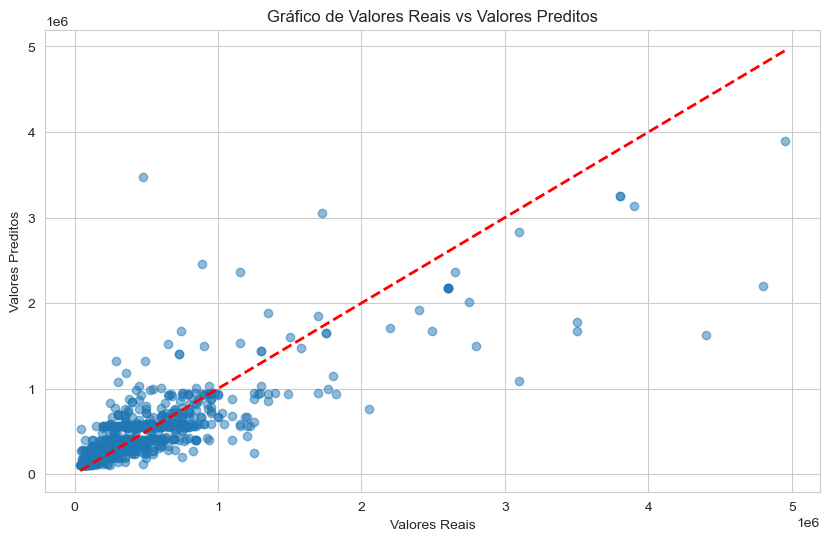

In [530]:
# Supondo que y_test contém os valores reais e y_pred_test contém os valores preditos

# Criar um gráfico de dispersão para valores reais vs valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Reais vs Valores Preditos')
plt.show()

In [531]:
# Calcular a média da diferença percentual
mean_percentage_difference = df_test['percentage_difference'].mean()

print(f"Média da diferença percentual: {mean_percentage_difference:.2f}%")

# Comparar essa métrica com outras métricas padrão
mae = np.mean(np.abs(df_test['predicted_price'] - df_test['selling_price']))
mse = np.mean((df_test['predicted_price'] - df_test['selling_price'])**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((df_test['selling_price'] - df_test['predicted_price'])**2) / np.sum((df_test['selling_price'] - np.mean(df_test['selling_price']))**2))

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Média da diferença percentual: 26.94%
MAE: 168136.59
MSE: 95909305203.51
RMSE: 309692.28
R²: 0.6656


/Users/lucaspadueli/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


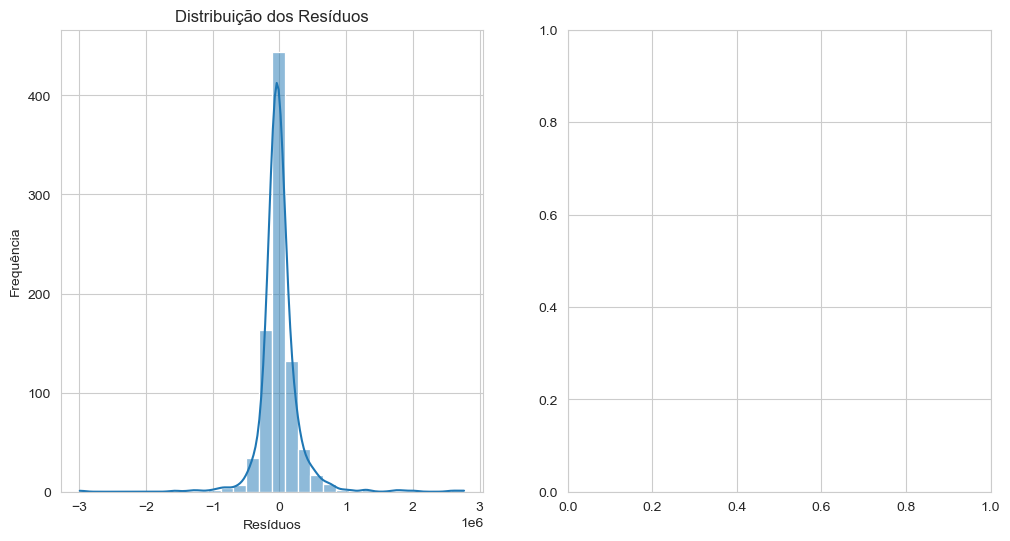

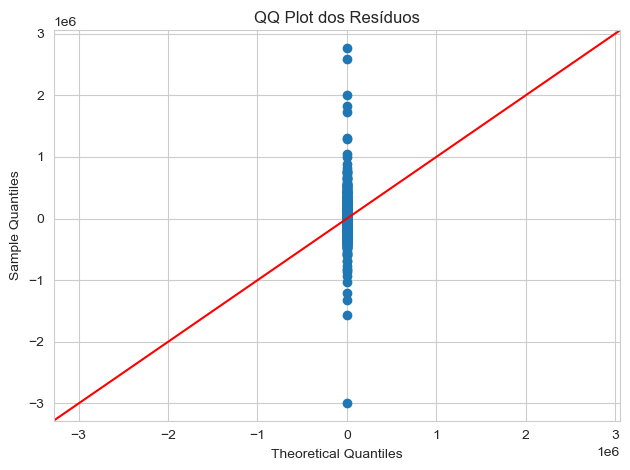

In [532]:
# Calcular os resíduos
residuos = y_test - y_pred_test

# Plotar a distribuição dos resíduos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuos, line='45')
plt.title('QQ Plot dos Resíduos')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

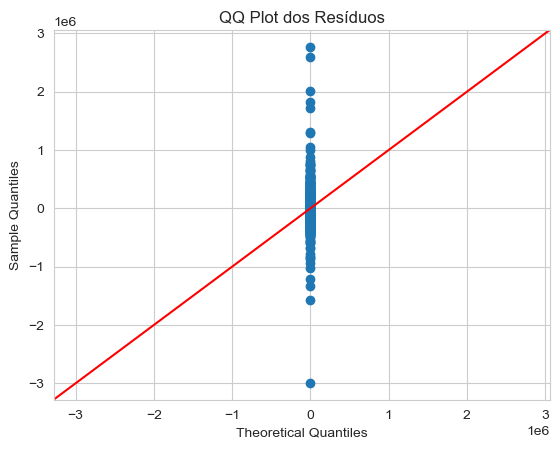

In [533]:
# Calcular os resíduos
residuos = y_test - y_pred_test

# Criar o QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuos, line='45')
plt.title('QQ Plot dos Resíduos')
plt.show()

In [534]:
residuos

1866    108491.93
2058    -20897.90
1791   -176425.24
1768    278574.76
1562    -91425.24
          ...    
3408    -15897.90
479    -214634.19
2214    -88645.32
2596     16782.10
2992   -118648.58
Name: selling_price, Length: 868, dtype: float64

<Figure size 800x600 with 0 Axes>

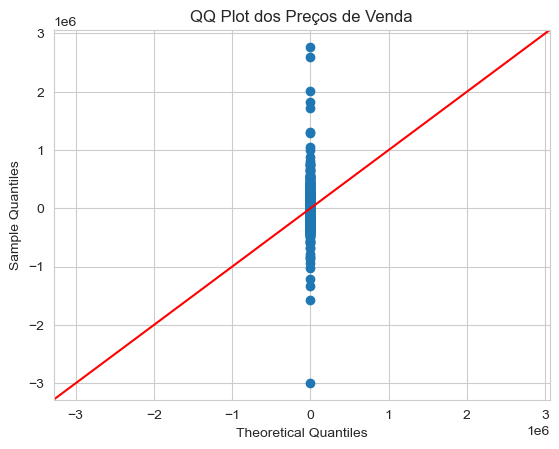

Teste de Shapiro-Wilk:
Estatística W: 0.7160972685741127
Valor-p: 6.580606429506657e-36


In [535]:
df = pd.DataFrame(residuos)

# Plotar o QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(df['selling_price'], line='45')
plt.title('QQ Plot dos Preços de Venda')
plt.show()

# Teste de Shapiro-Wilk para normalidade
shapiro_test = stats.shapiro(df['selling_price'])

print("Teste de Shapiro-Wilk:")
print(f"Estatística W: {shapiro_test.statistic}")
print(f"Valor-p: {shapiro_test.pvalue}")

In [536]:
max_percentage_difference = df_test['percentage_difference'].max()

print(f"Valor máximo da diferença percentual: {max_percentage_difference:.2f}%")

Valor máximo da diferença percentual: 1067.81%


In [537]:
# Calcular o valor máximo da coluna 'percentage_difference'
max_percentage_difference = df_test['percentage_difference'].max()

# Encontrar a linha onde a coluna 'percentage_difference' possui o valor máximo
linha_max_difference = df_test[df_test['percentage_difference'] == max_percentage_difference]

linha_max_difference

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,predicted_price,percentage_difference
1468,Tata Nano,2014,45000,7000,Petrol,Individual,Manual,Second Owner,525512.62,1067.81


In [539]:
tata_nano_2012_rows = df1_filtered[(df1_filtered['brand'] == 'Tata Nano') & (df1_filtered['year'] == 2014)]

# Mostrar as linhas filtradas
tata_nano_2012_rows

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
1468,Tata Nano,2014,45000,7000,Petrol,Individual,Manual,Second Owner,6
3199,Tata Nano,2014,140000,44416,Petrol,Dealer,Manual,First Owner,6
3218,Tata Nano,2014,55000,40000,Petrol,Individual,Manual,First Owner,6
4158,Tata Nano,2014,45000,7000,Petrol,Individual,Manual,Second Owner,6
